# Skip-Gram Implementation

In [109]:
# import necessary libraries
import numpy as np
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [110]:
# Step 1: Load the text corpus
sentences = []
with open('file.txt', 'r') as f:
    for line in f:
        sentences.append(line.strip().split('.'))

# Step 2: Preprocess the text corpus
corpus=[]
# Iterate through the list of sentences, break them into lists of words and remove the empty strings
for i in range(len(sentences)):
    sentences[i] = sentences[i][0].split(' ')

    # strip the words of any special characters
    sentences[i] = [word.strip(',').strip('?').strip('!').lower() for word in sentences[i]]

    sentences[i] = list(filter(None, sentences[i]))
    if(len(sentences[i])>0):
        corpus.append(sentences[i])

print(corpus)


[['food', 'is', 'an', 'integral', 'part', 'of', 'human', 'existence', 'sustaining', 'life', 'nourishing', 'our', 'bodies', 'and', 'delighting', 'our', 'senses'], ['fruits', 'and', 'vegetables', 'are', "nature's", 'bounty', 'offering', 'an', 'array', 'of', 'flavors', 'textures', 'and', 'colors'], ['protein-rich', 'foods', 'like', 'meat', 'fish', 'eggs', 'and', 'legumes', 'are', 'essential', 'for', 'growth', 'repair', 'and', 'overall', 'health'], ['dairy', 'products', 'including', 'milk', 'cheese', 'and', 'yogurt', 'are', 'valued', 'for', 'their', 'calcium', 'content', 'and', 'contribution', 'to', 'strong', 'bones', 'and', 'teeth'], ['spices', 'and', 'herbs', 'add', 'depth', 'and', 'complexity', 'to', 'dishes']]


In [111]:
# Step 3: Build the vocabulary
vocab = []
for sentence in corpus:
    for word in sentence:
        if word not in vocab:
            vocab.append(word)

vocab_size = len(vocab)

# Step 4: Build the training data (skip-gram pairs)
# Build the training data by creating a list of tuples of the form (current_word, context_word)
context_size = 2            
word_pairs = []
for sentence in corpus:
    for i in range(len(sentence)):
        for j in range(i-context_size, i+context_size+1):
            if j>=0 and j<len(sentence) and j!=i:
                word_pairs.append([sentence[i], sentence[j]])

print(word_pairs)

[['food', 'is'], ['food', 'an'], ['is', 'food'], ['is', 'an'], ['is', 'integral'], ['an', 'food'], ['an', 'is'], ['an', 'integral'], ['an', 'part'], ['integral', 'is'], ['integral', 'an'], ['integral', 'part'], ['integral', 'of'], ['part', 'an'], ['part', 'integral'], ['part', 'of'], ['part', 'human'], ['of', 'integral'], ['of', 'part'], ['of', 'human'], ['of', 'existence'], ['human', 'part'], ['human', 'of'], ['human', 'existence'], ['human', 'sustaining'], ['existence', 'of'], ['existence', 'human'], ['existence', 'sustaining'], ['existence', 'life'], ['sustaining', 'human'], ['sustaining', 'existence'], ['sustaining', 'life'], ['sustaining', 'nourishing'], ['life', 'existence'], ['life', 'sustaining'], ['life', 'nourishing'], ['life', 'our'], ['nourishing', 'sustaining'], ['nourishing', 'life'], ['nourishing', 'our'], ['nourishing', 'bodies'], ['our', 'life'], ['our', 'nourishing'], ['our', 'bodies'], ['our', 'and'], ['bodies', 'nourishing'], ['bodies', 'our'], ['bodies', 'and'], ['

In [112]:
def get_one_hot_encoding(word):
    one_hot_encoding = np.zeros(len(vocab))
    one_hot_encoding[vocab.index(word)] = 1
    return one_hot_encoding

In [113]:
# Step 5: Build the skip-gram model architecture
# Define the hyperparameters
embed_size = 5
learning_rate = 0.01
epochs = 100

# Define the model architecture
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(SkipGram, self).__init__()  # Call the parent class constructor
        self.embeddings = nn.Embedding(vocab_size, embed_size)      # input -> hidden
        self.linear1 = nn.Linear(embed_size, vocab_size)            # hidden -> output

    def forward(self, x):
        embeds = self.embeddings(x)
        out = self.linear1(embeds)
        probs = nn.functional.log_softmax(out, dim=1)
        return probs
    
model = SkipGram(vocab_size, embed_size)


In [114]:
# Step 6: Train the model

# Define the loss function and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(epochs):
    total_loss = 0
    for context, target in word_pairs:
    
        context_var = Variable(torch.LongTensor([vocab.index(target)])) # shape: [1]
        target_var = torch.LongTensor(get_one_hot_encoding(context))    # shape: [vocab_size]

        # Forward pass
        optimizer.zero_grad()  # Clear gradients
        probs = model(context_var).squeeze(0)  # shape: [1, vocab_size] -> [vocab_size]
        # print(probs.shape, target_var.shape)        # shape: [vocab_size]
        loss = loss_function(probs, target_var)
        total_loss += loss.item()  # Accumulate the loss

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()
        
    print('Epoch:', epoch, 'Loss:', total_loss)

Epoch: 0 Loss: 780.081201672554
Epoch: 1 Loss: 314.230689778924
Epoch: 2 Loss: 151.38184474781156
Epoch: 3 Loss: 89.23419434949756
Epoch: 4 Loss: 61.62660546973348
Epoch: 5 Loss: 47.46234148927033
Epoch: 6 Loss: 39.340762143954635
Epoch: 7 Loss: 34.24186503700912
Epoch: 8 Loss: 30.794185638427734
Epoch: 9 Loss: 28.321371600031853
Epoch: 10 Loss: 26.463236830197275
Epoch: 11 Loss: 25.013965132646263
Epoch: 12 Loss: 23.84857557527721
Epoch: 13 Loss: 22.887486385181546
Epoch: 14 Loss: 22.077644679695368
Epoch: 15 Loss: 21.382623095996678
Epoch: 16 Loss: 20.776452612131834
Epoch: 17 Loss: 20.24035583809018
Epoch: 18 Loss: 19.760252450592816
Epoch: 19 Loss: 19.325613705441356
Epoch: 20 Loss: 18.928233212325722
Epoch: 21 Loss: 18.561779783573
Epoch: 22 Loss: 18.221156374085695
Epoch: 23 Loss: 17.90237266011536
Epoch: 24 Loss: 17.602175122126937
Epoch: 25 Loss: 17.317923420108855
Epoch: 26 Loss: 17.047438638750464
Epoch: 27 Loss: 16.788925410714
Epoch: 28 Loss: 16.54090691683814
Epoch: 29 Los

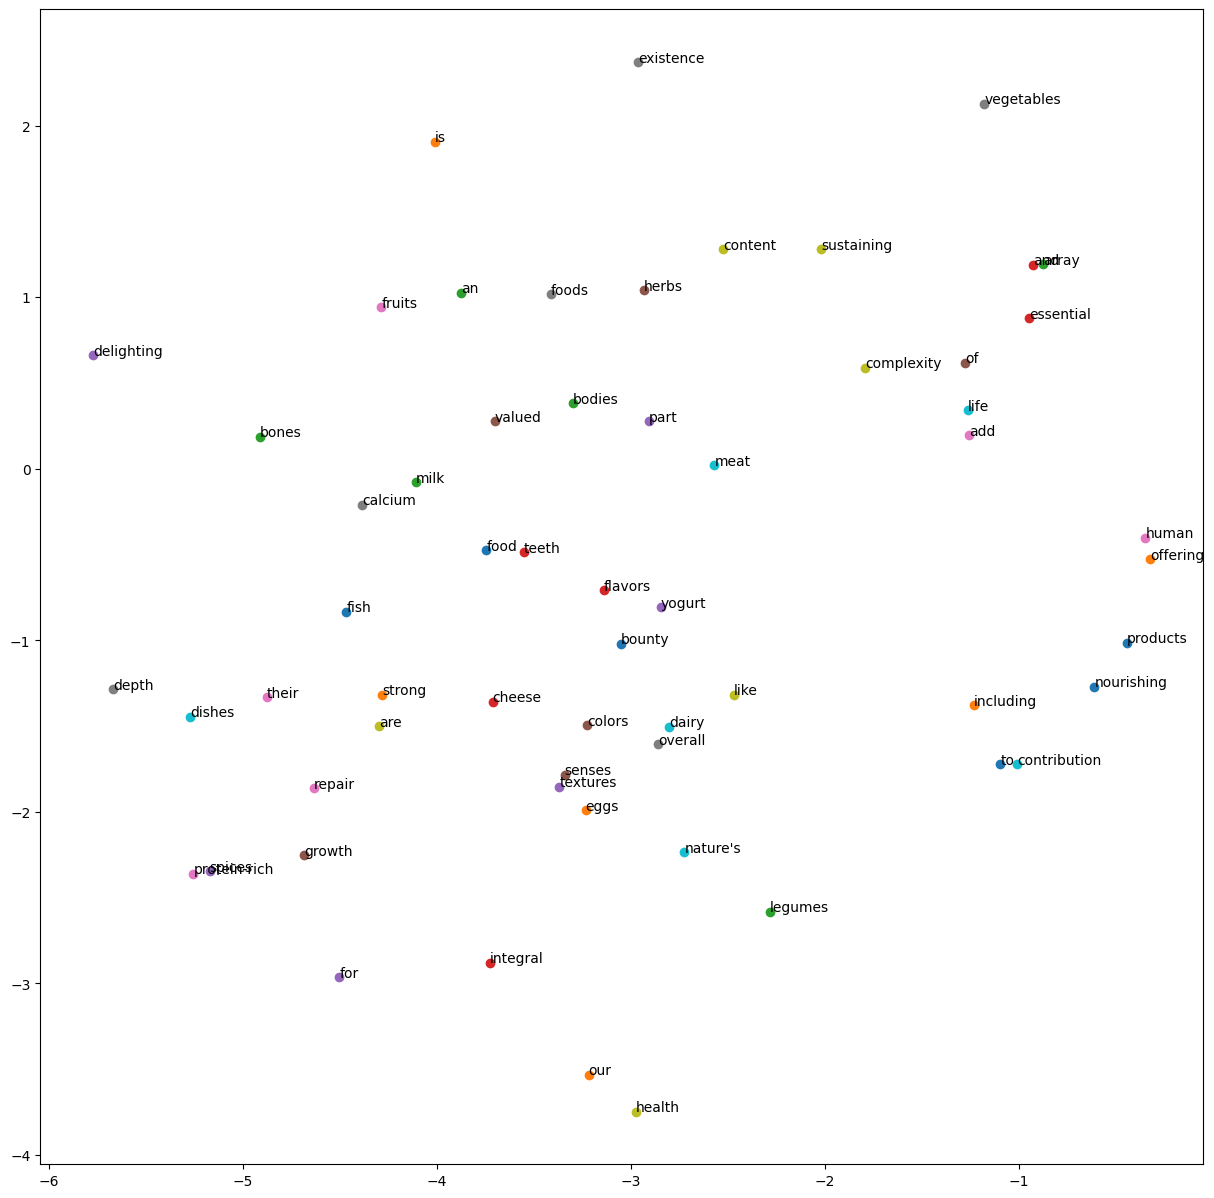

In [116]:
# Step 7: Visualize the embeddings
# Get the weights of the embeddings
embeddings = model.embeddings.weight.data.numpy()

# dimensionality reduction to 2 dimensions using t-SNE for visualization
from sklearn.manifold import TSNE
embeddings = TSNE(n_components=2).fit_transform(embeddings)

# Plot the embeddings
fig, ax = plt.subplots(figsize=(15, 15))
for word in vocab:
    embedding = embeddings[vocab.index(word)]
    plt.scatter(embedding[0], embedding[1])
    ax.annotate(word, (embedding[0], embedding[1]))

plt.show()